### 중요  : XOR 학습하기 

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [57]:
tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

In [58]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [59]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [60]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [61]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [62]:
# Launch graph
sess = tf.Session()

In [63]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

In [64]:
vcost=[]

In [65]:
for i in range(50001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})

    if i % 1000 ==0:
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print('step={} / cost={}'.format(i, c1))
    vcost.append(c1)

step=0 / cost=0.25138163566589355
step=1000 / cost=0.25000086426734924
step=2000 / cost=0.24994328618049622
step=3000 / cost=0.24988210201263428
step=4000 / cost=0.24979770183563232
step=5000 / cost=0.2496640831232071
step=6000 / cost=0.24943721294403076
step=7000 / cost=0.24902935326099396
step=8000 / cost=0.24822787940502167
step=9000 / cost=0.24638506770133972
step=10000 / cost=0.24125440418720245
step=11000 / cost=0.2270428091287613
step=12000 / cost=0.20334751904010773
step=13000 / cost=0.18227025866508484
step=14000 / cost=0.16610881686210632
step=15000 / cost=0.1520865261554718
step=16000 / cost=0.1295020878314972
step=17000 / cost=0.05577881634235382
step=18000 / cost=0.02303645946085453
step=19000 / cost=0.013756200671195984
step=20000 / cost=0.009656194597482681
step=21000 / cost=0.00737968273460865
step=22000 / cost=0.005942383781075478
step=23000 / cost=0.004957257770001888
step=24000 / cost=0.004242373630404472
step=25000 / cost=0.00370130711235106
step=26000 / cost=0.0032

### 결과 확인하기

In [66]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1)
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)
    #l2cast = tf.cast(l2 > 0.5, dtype=tf.float32)
    print( i, sess.run(l2))
    #print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])   


0 [[0.03135686]]
1 [[0.971772]]
2 [[0.97326905]]
3 [[0.02904612]]


* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용

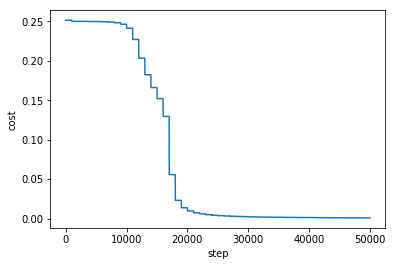

In [67]:
plt.plot(vcost)
plt.xlabel('step')
plt.ylabel('cost')
plt.show()

### 참고 : Sigmoid

In [29]:
y1 = 0.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

0.0 --> 0.5


Sigmoid를 그려볼까요?

In [25]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [26]:
for i in range(len(x1)):
    y1 = x1[i]
    y2 = sess.run(tf.sigmoid(y1))
    print('{} --> {}'.format(y1, y2))

-10.0 --> 4.5397868702434395e-05
-9.5 --> 7.484622751061123e-05
-9.0 --> 0.00012339457598623172
-8.5 --> 0.00020342697805520653
-8.0 --> 0.0003353501304664781
-7.5 --> 0.0005527786369235996
-7.0 --> 0.0009110511944006454
-6.5 --> 0.0015011822567369917
-6.0 --> 0.0024726231566347743
-5.5 --> 0.004070137715896128
-5.0 --> 0.0066928509242848554
-4.5 --> 0.01098694263059318
-4.0 --> 0.01798620996209156
-3.5 --> 0.02931223075135632
-3.0 --> 0.04742587317756678
-2.5 --> 0.07585818002124355
-2.0 --> 0.11920292202211755
-1.5 --> 0.18242552380635635
-1.0 --> 0.2689414213699951
-0.5 --> 0.3775406687981454
0.0 --> 0.5
0.5 --> 0.6224593312018546
1.0 --> 0.7310585786300049
1.5 --> 0.8175744761936437
2.0 --> 0.8807970779778823
2.5 --> 0.9241418199787566
3.0 --> 0.9525741268224334
3.5 --> 0.9706877692486436
4.0 --> 0.9820137900379085
4.5 --> 0.9890130573694068
5.0 --> 0.9933071490757153
5.5 --> 0.995929862284104
6.0 --> 0.9975273768433653
6.5 --> 0.998498817743263
7.0 --> 0.9990889488055994
7.5 --> 0